# Improved balance data


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils import data
from torch.utils.data.sampler import SubsetRandomSampler
import dataset
import importlib 
importlib.reload(dataset)


import numpy as np
import data
from dataset import rdDataset
from model import rdcnn_2
from math import log10
from matplotlib import pyplot as plt

# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:1" if use_cuda else "cpu")
# cudnn.benchmark = True
path = './data'

# Parameters

params = {'test_split': .25,
          'shuffle_dataset': True,
          'batchsize': 32,
          'testBatchsize': 10,
          'random_seed': 42,
          'numworkers':32}
max_epoches = 100
learning_rate = 1e-3
drop_rate = 0.0

print('===> Loading datasets')
# Load All Dataset
dataset = rdDataset(path)

# Creating data indices for training and validation splits:
training_data_loader, testing_data_loader = data.DatasetSplit(dataset, **params)

print('===> Building model')
model = rdcnn_2(drop_rate).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=1e-5)



def train(epoch):
    epoch_loss = 0
    for iteration, batch in enumerate(training_data_loader, 1):
        input, target = batch[0].to(device, torch.float), batch[1].to(device, torch.float)
        optimizer.zero_grad()
        loss = criterion(model(input), target)
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()

#         print("===> Epoch[{}]({}/{}): Loss: {:.4f}".format(epoch, iteration, len(training_data_loader), loss.item()))

    print("===> Epoch {} Complete: Avg. Loss: {:.4f}".format(epoch, epoch_loss / len(training_data_loader)))
    return epoch, epoch_loss / len(training_data_loader)
    
def test():
    avg_error = 0
    avg_loss = 0
    with torch.no_grad():
        for batch in testing_data_loader:
            input, target = batch[0].to(device, torch.float), batch[1].to(device, torch.float)

            prediction = model(input)
            tmp_error = 0
#             print(len(prediction))
            for j in range(len(prediction)):
                tmp_error += torch.mean((prediction[j]-target[j])**2/torch.max(target[j]))
            avg_error += tmp_error / len(prediction)
            mse = criterion(prediction, target)
            avg_loss += mse
    print("===> Avg. Loss: {:.4f} ".format(avg_loss / len(testing_data_loader)))
    print("===> Avg. Error: {:.4f} ".format(avg_error / len(testing_data_loader)))
    return avg_loss / len(testing_data_loader),avg_error / len(testing_data_loader)

def checkpoint(epoch):
    model_out_path = "./checkpoint_largedata4/model_epoch_{}.pth".format(epoch)
    torch.save(model, model_out_path)
    print("Checkpoint saved to {}".format(model_out_path))
    
    

===> Loading datasets
===> Building model


In [5]:
L_train_loss = []
L_test_loss = []
L_test_error = []
for epoch in range(1, ma是x_epoches + 1):
    train_loss = train(epoch)
    test_loss,test_error = test()
    checkpoint(epoch)
#     data.TestErrorPlot(model,device, testing_data_loader)
    L_train_loss.append(train_loss)
    L_test_loss.append(test_loss)
    L_test_error.append(test_error)

===> Epoch 1 Complete: Avg. Loss: 0.0062
===> Avg. Loss: 0.0022 
===> Avg. Error: 0.0024 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_1.pth
===> Epoch 2 Complete: Avg. Loss: 0.0018
===> Avg. Loss: 0.0011 
===> Avg. Error: 0.0012 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_2.pth
===> Epoch 3 Complete: Avg. Loss: 0.0011
===> Avg. Loss: 0.0019 
===> Avg. Error: 0.0021 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_3.pth
===> Epoch 4 Complete: Avg. Loss: 0.0009
===> Avg. Loss: 0.0009 
===> Avg. Error: 0.0010 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_4.pth
===> Epoch 5 Complete: Avg. Loss: 0.0008
===> Avg. Loss: 0.0006 
===> Avg. Error: 0.0007 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_5.pth
===> Epoch 6 Complete: Avg. Loss: 0.0008
===> Avg. Loss: 0.0005 
===> Avg. Error: 0.0006 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_6.pth
===> Epoch 7 Complete: Avg. Loss: 0.0007
===> Avg. Loss: 0.0005 
===> Avg. Error: 0.0006

===> Epoch 55 Complete: Avg. Loss: 0.0005
===> Avg. Loss: 0.0005 
===> Avg. Error: 0.0005 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_55.pth
===> Epoch 56 Complete: Avg. Loss: 0.0005
===> Avg. Loss: 0.0008 
===> Avg. Error: 0.0009 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_56.pth
===> Epoch 57 Complete: Avg. Loss: 0.0005
===> Avg. Loss: 0.0005 
===> Avg. Error: 0.0006 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_57.pth
===> Epoch 58 Complete: Avg. Loss: 0.0005
===> Avg. Loss: 0.0004 
===> Avg. Error: 0.0005 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_58.pth
===> Epoch 59 Complete: Avg. Loss: 0.0005
===> Avg. Loss: 0.0006 
===> Avg. Error: 0.0006 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_59.pth
===> Epoch 60 Complete: Avg. Loss: 0.0005
===> Avg. Loss: 0.0004 
===> Avg. Error: 0.0004 
Checkpoint saved to ./checkpoint_largedata3/model_epoch_60.pth
===> Epoch 61 Complete: Avg. Loss: 0.0005
===> Avg. Loss: 0.0004 
===> Avg. 

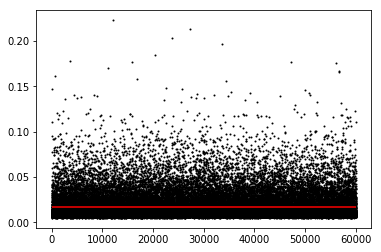

0.01628956923581316


In [5]:
import importlib 
importlib.reload(data)
data.TestErrorPlot(model,device, testing_data_loader)

In [4]:
model = torch.load('./checkpoint_largedata3/model_epoch_100.pth')
model.eval()

/export/home/math/angranl/anaconda3/lib/python3.7/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'model.rdcnn_2' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


rdcnn_2(
  (discriminator): Sequential(
    (0): Conv2d(5, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Dropout(p=0.0)
    (3): Conv2d(40, 20, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): ReLU(inplace)
    (5): Dropout(p=0.0)
    (6): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(20, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): ReLU(inplace)
    (9): Dropout(p=0.0)
    (10): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (11): Dropout(p=0.0)
  )
  (generator): Sequential(
    (0): ConvTranspose2d(10, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace)
    (2): ConvTranspose2d(40, 20, kernel_size=(2, 2), stride=(2, 2))
    (3): ReLU(inplace)
    (4): ConvTranspose2d(20, 10, kernel_size=(2, 2), stride=(2, 2))
    (5): Tanh()
    (6): ConvTranspose2d(10, 1, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (

In [6]:
def ComputeTestError(prediction, target):
    # tmp_error = torch.mean(torch.abs(prediction-target))/torch.abs(torch.max(target)-torch.min(target))
    # tmp_error = torch.mean(torch.abs(prediction-target)**2)/torch.abs(torch.max(target))
    # tmp_error = torch.sqrt(torch.abs(prediction-target).pow(2).sum())/prediction.numel()/torch.abs(torch.max(target)-torch.min(target))
    tmp_error = torch.sqrt(torch.mean(torch.abs(prediction-target)**2))/torch.abs(torch.max(target))
    # tmp_error = torch.mean(torch.abs(prediction-target)**2)/torch.abs(torch.max(target)-torch.min(target))
    return tmp_error

In [7]:
import heapq

In [8]:
heap_kmin = []
heap_kmax = []

i=0

with torch.no_grad():
    for batch in testing_data_loader:
        input, target = batch[0].to(device, torch.float), batch[1].to(device, torch.float)
        prediction = model(input)
        
        for j in range(len(prediction)):
            tmp_error = ComputeTestError(prediction[j], target[j]).item()
            i+=1
            if(i<6):
                heapq.heappush(heap_kmin, (-tmp_error, input[j],target[j],prediction[j]))
                heapq.heappush(heap_kmax, (tmp_error, input[j],target[j],prediction[j]))
            else:
                if (heap_kmin[0][0]<-tmp_error):
                    heapq.heappop(heap_kmin)
                    heapq.heappush(heap_kmin, (-tmp_error, input[j],target[j],prediction[j]))
                if (heap_kmax[0][0]<tmp_error):
                    heapq.heappop(heap_kmax)
                    heapq.heappush(heap_kmax, (tmp_error, input[j],target[j],prediction[j]))

In [9]:
error_worst = [x for x, y,z,k in sorted(heap_kmax)]
input_worst = [y for x, y,z,k in sorted(heap_kmax)]
target_worst = [z for x, y,z,k in sorted(heap_kmax)]
prediction_worst = [k for x, y,z,k in sorted(heap_kmax)]

In [10]:
error_best = [x for x, y,z,k in sorted(heap_kmin)]
input_best = [y for x, y,z,k in sorted(heap_kmin)]
target_best = [z for x, y,z,k in sorted(heap_kmin)]
prediction_best = [k for x, y,z,k in sorted(heap_kmin)]

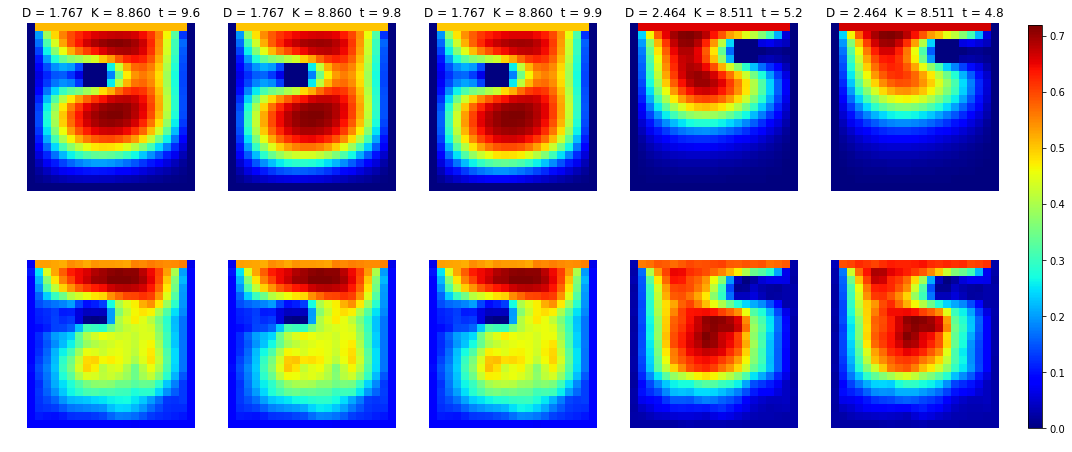

In [35]:
fig, ax = plt.subplots(2,5, figsize=(20,8))
for i in range(5):
    input = input_worst[i].cpu().numpy()
    target = target_worst[i]
    prediction = prediction_worst[i]

    im_tar = ax[0][i].imshow(target[0].cpu().numpy()[::-1],cmap = "jet")
    ax[0][i].axis('off')
    ax[0][i].set_title("D = "+str.format('{0:.3f}', input[3][0][0])+"  K = "+str.format('{0:.3f}', input[2][0][0])+"  t = "+str(input[1][0][0]),size=12)

    
    ax[1][i].imshow(prediction[0].cpu().numpy()[::-1],cmap = "jet")
    ax[1][i].axis('off')
    fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.7])
fig.colorbar(im_tar, cax=cbar_ax)

plt.show()
fig.savefig("Best_Worst/worst.png")

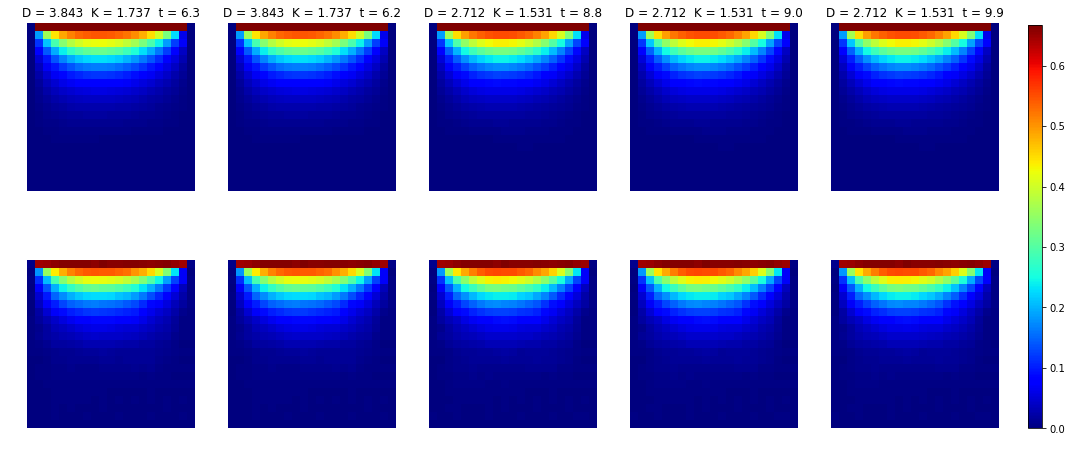

In [36]:
fig, ax = plt.subplots(2,5, figsize=(20,8))
for i in range(5):
    input = input_best[i].cpu().numpy()
    target = target_best[i]
    prediction = prediction_best[i]

    im_tar = ax[0][i].imshow(target[0].cpu().numpy()[::-1],cmap = "jet")
    ax[0][i].axis('off')
    ax[0][i].set_title("D = "+str.format('{0:.3f}', input[3][0][0])+"  K = "+str.format('{0:.3f}', input[2][0][0])+"  t = "+str(input[1][0][0]),size=12)

    
    ax[1][i].imshow(prediction[0].cpu().numpy()[::-1],cmap = "jet")
    ax[1][i].axis('off')
    fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.7])
fig.colorbar(im_tar, cax=cbar_ax)

plt.show()
fig.savefig("Best_Worst/best.png")

## Best prediction

In [ ]:
def ComputeTestError(prediction, target):
    # tmp_error = torch.mean(torch.abs(prediction-target))/torch.abs(torch.max(target)-torch.min(target))
    # tmp_error = torch.mean(torch.abs(prediction-target)**2)/torch.abs(torch.max(target))
    # tmp_error = torch.sqrt(torch.abs(prediction-target).pow(2).sum())/prediction.numel()/torch.abs(torch.max(target)-torch.min(target))
    tmp_error = torch.sqrt(torch.mean(torch.abs(prediction-target)**2))/torch.abs(torch.max(target))
    # tmp_error = torch.mean(torch.abs(prediction-target)**2)/torch.abs(torch.max(target)-torch.min(target))
    return tmp_error

In [ ]:
def TestErrorPlot(model, device, testing_data_loader):
    error_List = []
    testID_List =[]
    count = 1

    with torch.no_grad():
        for batch in testing_data_loader:
            input, target = batch[0].to(device, torch.float), batch[1].to(device, torch.float)

            prediction = model(input)
            tmp_error = 0
            for j in range(len(prediction)):
                # tmp_error = torch.mean(torch.abs(prediction[j]-target[j]))/torch.abs(torch.max(target[j])-torch.min(target[j]))
                tmp_error = ComputeTestError(prediction[j], target[j])
                error_List.append(tmp_error.item())
                testID_List.append(count)
                count += 1

    testID_List = np.asarray(testID_List)
    error_List = np.asarray(error_List)
    avg_error = np.average(error_List)
    # print(np.asarray(testID_List).type)
    # print(np.asarray(error_List).size)
    plt.plot(testID_List, error_List,'ko', zorder=1,markersize=1)
    # plt.scatter(np.asarray(testID_List), np.asarray(error_List), 'bo')
    plt.hlines(avg_error, 1, count, colors='r', zorder=2)
    plt.show()
    print(avg_error)



In [17]:
error_List = []
testID_List =[]
count = 1

with torch.no_grad():
    for batch in testing_data_loader:
        input, target = batch[0].to(device, torch.float), batch[1].to(device, torch.float)

        prediction = model(input)
        tmp_error = 0
        for j in range(len(prediction)):
            # tmp_error = torch.mean(torch.abs(prediction[j]-target[j]))/torch.abs(torch.max(target[j])-torch.min(target[j]))
            tmp_error = ComputeTestError(prediction[j], target[j])
            error_List.append(tmp_error.item())
            testID_List.append(count)
            count += 1

testID_List = np.asarray(testID_List)
error_List = np.asarray(error_List)
avg_error = np.average(error_List)
# # print(np.asarray(testID_List).type)
# # print(np.asarray(error_List).size)
# plt.plot(testID_List, error_List,'ko', zorder=1,markersize=1)
# # plt.scatter(np.asarray(testID_List), np.asarray(error_List), 'bo')
# plt.hlines(avg_error, 1, count, colors='r', zorder=2)
# plt.show()
# print(avg_error)

In [8]:
ind = np.argpartition(error_List, -5)[-5:]
print(ind)

error_List[ind]

[29252 44648 25027 48939 12681]


array([0.18433422, 0.22271203, 0.21325128, 0.20270693, 0.19697653])

In [13]:
ind = np.argpartition(error_List, 5)[:5]
print(ind)

error_List[ind]

[24625  1239 52527 13576 59816]


array([0.00476914, 0.00478762, 0.00487734, 0.00482616, 0.00487566])

In [18]:
ind = error_List.argsort()[-5:][::-1]
ind

array([45862, 40938, 23069, 35193, 35907])

In [19]:
error_List[ind]

array([0.22271203, 0.21325128, 0.20270693, 0.19697653, 0.18433422])

In [73]:
error_List[7159]

0.22271202504634857

In [50]:
ind = error_List.argsort()[:5][::1]
ind[0]

21151

In [83]:
prediction_L = []
input_L = []
target_L = []
i=-1

with torch.no_grad():
    for batch in testing_data_loader:
        i+=1
        if i == 715:
            input, target = batch[0].to(device, torch.float), batch[1].to(device, torch.float)
            input_L.append(input)
            target_L.append(target)
            prediction = model(input)
            prediction_L.append(prediction)
            break        

In [84]:
i=9
ComputeTestError(prediction[i], target[i]).item()

0.01386063639074564

In [33]:
prediction_L = []
input_L = []
target_L = []
i=-1

with torch.no_grad():
    for batch in testing_data_loader:
        i+=1
        if i == (ind[0]-1)//10:
            input, target = batch[0].to(device, torch.float), batch[1].to(device, torch.float)
            input_L.append(input)
            target_L.append(target)
            prediction = model(input)
            prediction_L.append(prediction)
            break   

715

In [72]:
i=9
ComputeTestError(prediction[i], target[i]).item()

0.01480217557400465

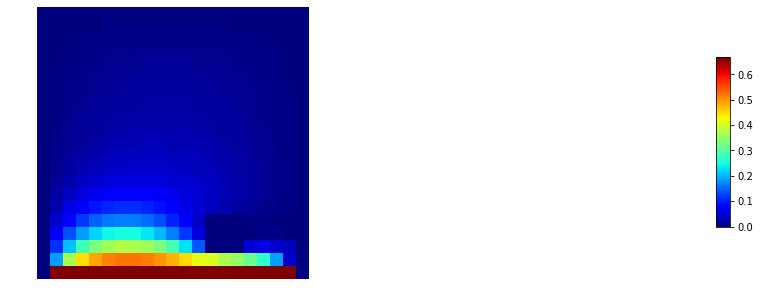

In [59]:
input = input_L[0].cpu().numpy()
target = target_L[0]
fig, ax = plt.subplots(1,1, figsize=(20,5))

im = ax.imshow(target[9][0].cpu(),cmap = "jet")
ax.axis('off')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, 0.27, 0.01, 0.47])
fig.colorbar(im, cax=cbar_ax)


plt.show()

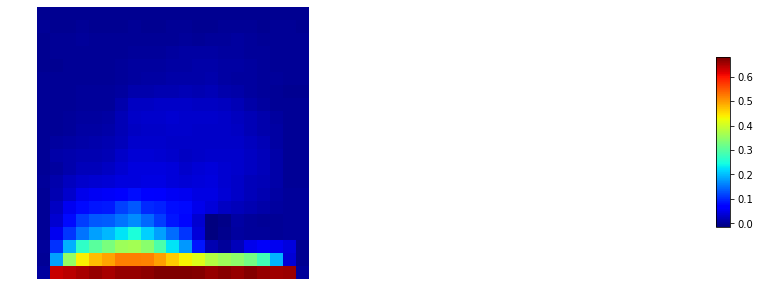

In [58]:
prediction = prediction_L[0]
fig, ax = plt.subplots(1,1, figsize=(20,5))

im = ax.imshow(prediction[9][0].cpu(),cmap = "jet")
ax.axis('off')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, 0.27, 0.01, 0.47])
fig.colorbar(im, cax=cbar_ax)

plt.show()

In [5]:
def ComputeTestError(prediction, target):
    # tmp_error = torch.mean(torch.abs(prediction-target))/torch.abs(torch.max(target)-torch.min(target))
    # tmp_error = torch.mean(torch.abs(prediction-target)**2)/torch.abs(torch.max(target))
    # tmp_error = torch.sqrt(torch.abs(prediction-target).pow(2).sum())/prediction.numel()/torch.abs(torch.max(target)-torch.min(target))
    tmp_error = torch.sqrt(torch.mean(torch.abs(prediction-target)**2))/torch.abs(torch.max(target))
    # tmp_error = torch.mean(torch.abs(prediction-target)**2)/torch.abs(torch.max(target)-torch.min(target))
    return tmp_error

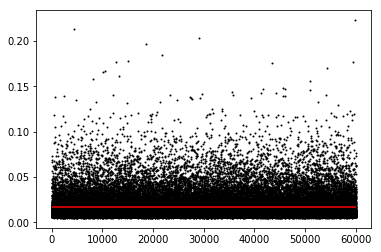

0.01628956923581316


In [15]:
import importlib 
importlib.reload(data)
data.TestErrorPlot(model,device, testing_data_loader)

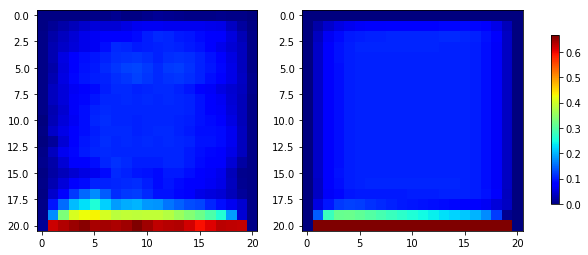

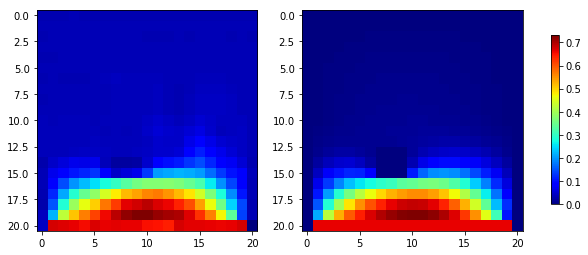

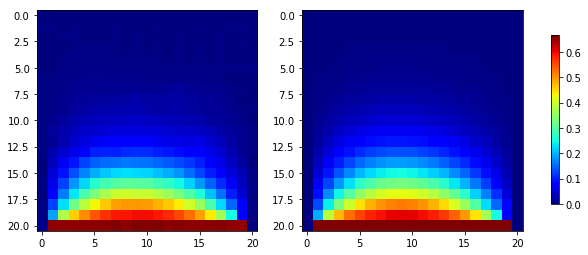

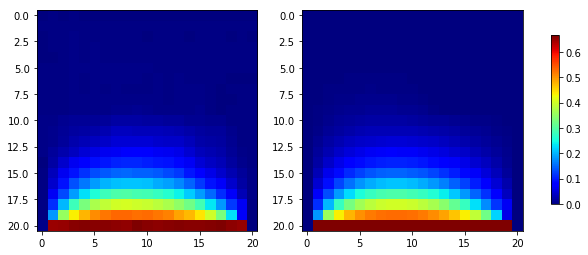

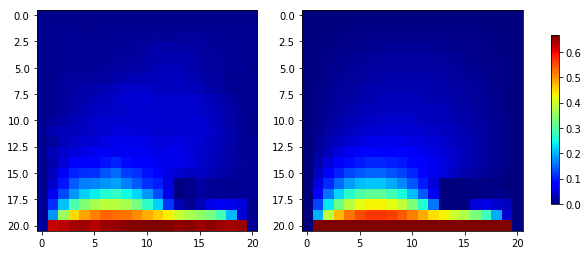

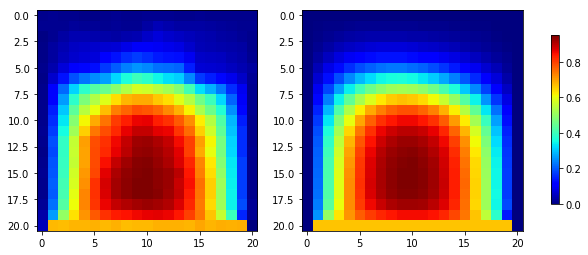

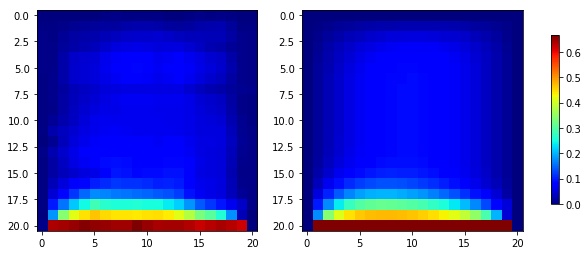

In [7]:
from matplotlib import pyplot as plt
with torch.no_grad():
    for batch in testing_data_loader:
        input, target = batch[0].to(device, torch.float), batch[1].to(device, torch.float)

        prediction = model(input)
        
for t in range(len(prediction)):
    fig, ax = plt.subplots(1,2, figsize=(10,5))

    im = ax[0].imshow(prediction[t][0].cpu(),cmap = "jet")
    im = ax[1].imshow(target[t][0].cpu(),cmap = "jet")

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.84, 0.27, 0.01, 0.47])
    fig.colorbar(im, cax=cbar_ax)

plt.show()